# Connect to google Drive to get The data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the necessary libraries that we will use in this project

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Read The Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/diabetes.csv')

# Explore The Data

In [ ]:
# Print the list of columns
print('List of Columns : ')
for column in df.columns:
  print(column)

List of Columns : 
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [ ]:
# display The First 5 rows of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Counting The Number of samples which have 0 and 1

In [ ]:
# Counting The Number of Classes
a=np.unique(df[['Outcome']],return_counts=True)
a = np.array(a)

print('The Number of Samples which have class 0 is : ', a[:,0][1])
print('The Number of Samples which have class 1 is : ', a[:,1][1])

The Number of Samples which have class 0 is :  500
The Number of Samples which have class 1 is :  268


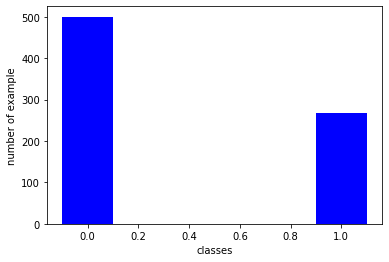

In [ ]:
plt.bar(a[0],a[1],width=0.2,color="blue")
plt.xlabel("classes")
plt.ylabel("number of example")
plt.show()

In [ ]:
# Print infos about the data
print('Infos on The Data : ')
df.info(verbose=True)

Infos on The Data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Display The Infos About The Data (like : mean , standard deviation , max value , min value ...)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


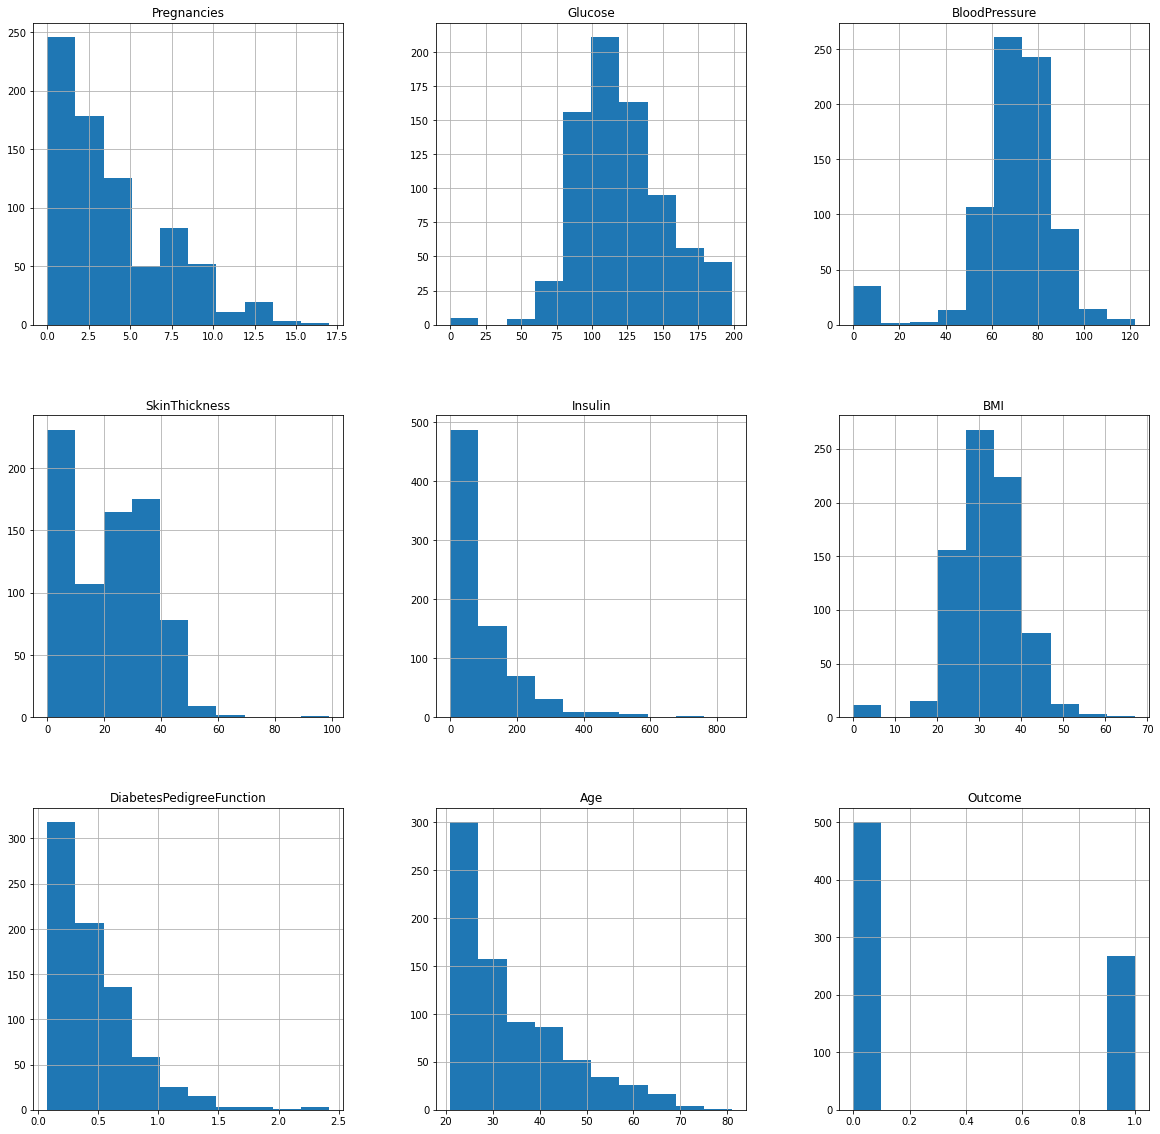

In [ ]:
# Visualize The Distribution of each Column
p = df.hist(figsize = (20,20))

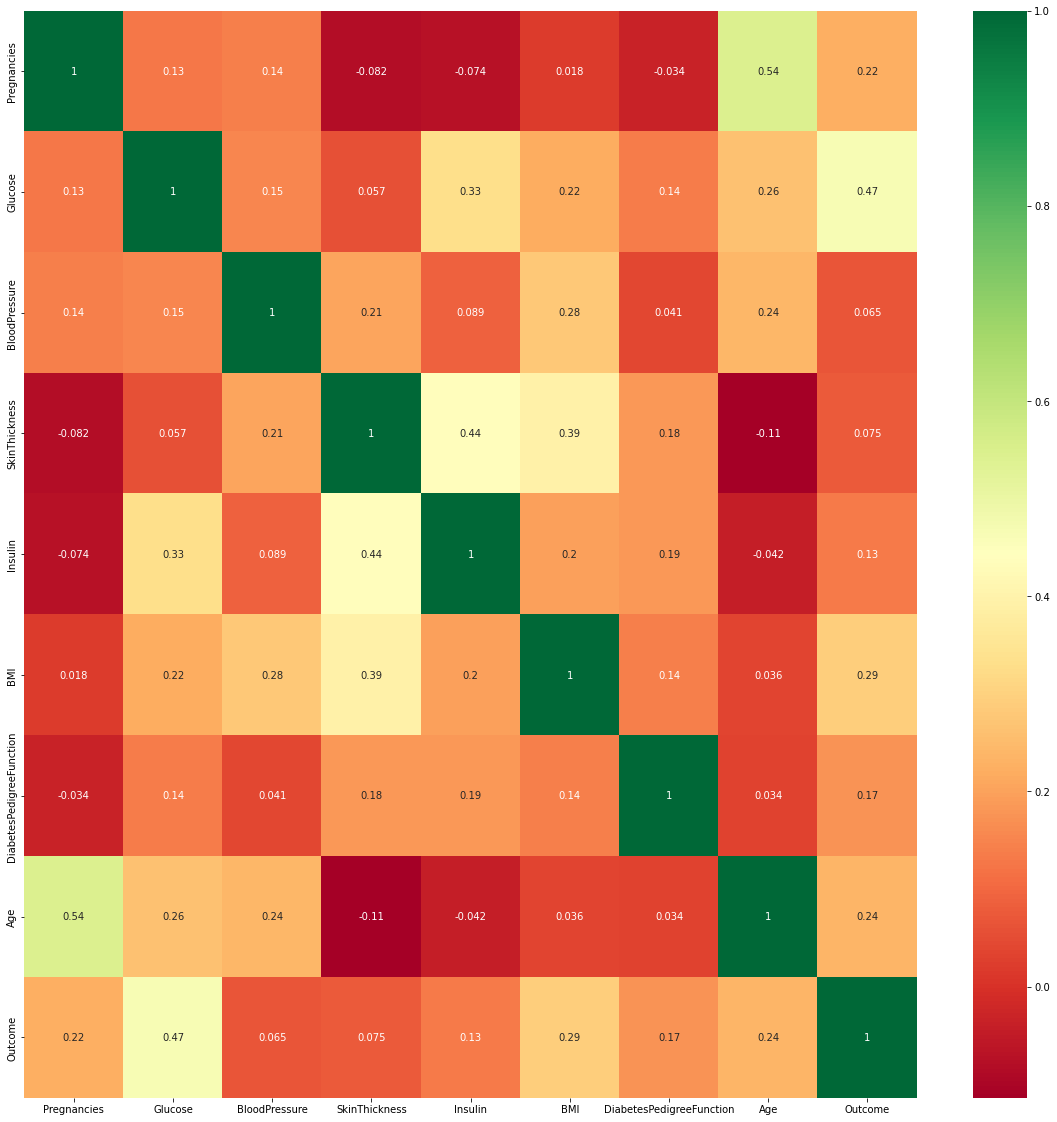

In [ ]:
# display the correlation between each Feature
correlation_Matrix = df.corr()
top_corr_features = correlation_Matrix.index
plt.figure(figsize=(20,20))
#plot The correlation Matrix as a heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
print('The Correlation Matrix : ')
print(correlation_Matrix)

The Correlation Matrix : 
                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


# data preprocessing :
* Handling Missing Values .
* data Scaling .
* Data selection .
* Data Splitting .


In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
print(f'x.shape : {x.shape} , type(x) : {type(x)} ')
print(f'y.shape : {y.shape} , type(y) : {type(y)} ')

x.shape : (768, 8) , type(x) : <class 'numpy.ndarray'> 
y.shape : (768,) , type(y) : <class 'numpy.ndarray'> 


In [ ]:
# check if any nan value is present in our dataset
df.isnull().values.any()

False

In [ ]:
# Counting The Number of Columns which have 0
for column in df.columns :
  print(f"number of rows contains 0 in  {column} is : {len(df.loc[df[column] == 0])}")

number of rows contains 0 in  Pregnancies is : 111
number of rows contains 0 in  Glucose is : 5
number of rows contains 0 in  BloodPressure is : 35
number of rows contains 0 in  SkinThickness is : 227
number of rows contains 0 in  Insulin is : 374
number of rows contains 0 in  BMI is : 11
number of rows contains 0 in  DiabetesPedigreeFunction is : 0
number of rows contains 0 in  Age is : 0
number of rows contains 0 in  Outcome is : 500


### Handling Missing Values

---
we don't have nan values in our data set, but we have a lot of zero values in our data which will negatively influence our model.

now we need to find a way to replace these zero values , we have two options:
* **replace zero values with the mean**.
* **replace zero values with the median**.

In [ ]:
imputer = SimpleImputer(missing_values=0, strategy="median")
x = imputer.fit_transform(x)

### Feature Selecting

In [ ]:
# Select 4 Important Features 
#select_feature = SelectKBest(chi2, k=7).fit(df[df.columns[:-1]].values, df[df.columns[-1]].values)
select_feature = SelectKBest(chi2, k=7).fit(x, y)
for score , column in zip(select_feature.scores_ , df.columns[:-1]):
  print(column , ' : ' , score)

Pregnancies  :  94.87262102206074
Glucose  :  1418.442397291733
BloodPressure  :  42.5825070857466
SkinThickness  :  94.02533496329579
Insulin  :  1689.7110747760696
BMI  :  108.76636653252069
DiabetesPedigreeFunction  :  5.392681546971445
Age  :  181.30368904430023


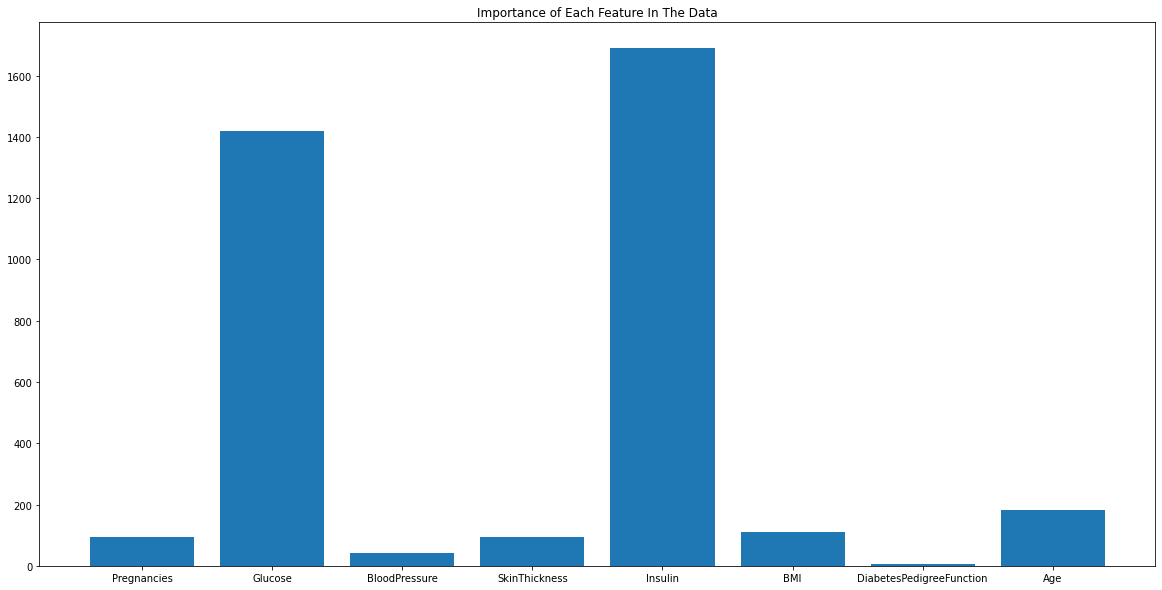

In [ ]:
# Plot The Important of each Column
plt.figure(figsize=(20, 10))
plt.bar( df.columns[:-1] , select_feature.scores_ )
plt.title('Importance of Each Feature In The Data')
plt.show()

In [ ]:
x  = select_feature.transform(x)
print('The Dataset Shape After Feature Selection : ', x.shape)

The Dataset Shape After Feature Selection :  (768, 7)


### Data Scaling

In [ ]:

print('Before Scaling : ')

ranges = [ (np.min(x[:,i]) , np.max(x[:,i])) for i in range(x.shape[1])]

for i , column in enumerate(df.columns[:-2]):
  print(f'Column name : {column} , values between {ranges[i]}')
print('\n')
standardscaler=StandardScaler()
x = standardscaler.fit_transform(x)
print(f'After Scaling :   .',)

ranges = [ (np.min(x[:,i]) , np.max(x[:,i])) for i in range(x.shape[1])]

for i , column in enumerate(df.columns[:-2]):
  print(f'Column name : {column} , values between {ranges[i]}')

Before Scaling : 
Column name : Pregnancies , values between (1.0, 17.0)
Column name : Glucose , values between (44.0, 199.0)
Column name : BloodPressure , values between (24.0, 122.0)
Column name : SkinThickness , values between (7.0, 99.0)
Column name : Insulin , values between (14.0, 846.0)
Column name : BMI , values between (18.2, 67.1)
Column name : DiabetesPedigreeFunction , values between (21.0, 81.0)


After Scaling :   .
Column name : Pregnancies , values between (-1.1492800908109853, 4.222478660001259)
Column name : Glucose , values between (-2.5529314408155828, 2.542658074856566)
Column name : BloodPressure , values between (-4.002619270841412, 4.104082292642026)
Column name : SkinThickness , values between (-2.516428628788288, 7.955376612725657)
Column name : Insulin , values between (-1.4673527974365268, 8.170441917982268)
Column name : BMI , values between (-2.0747827319108394, 5.042396703004941)
Column name : DiabetesPedigreeFunction , values between (-1.0415494364835023

### Split The Data into training set and testing set

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25)

print(f"x_train.shape : {x_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"x_test.shape : {x_test.shape}")
print(f"y_test.shape : {y_test.shape}")

x_train.shape : (576, 7)
y_train.shape : (576,)
x_test.shape : (192, 7)
y_test.shape : (192,)


# In this Section i will try to apply this following Algorithms on our dataset and compare The Result :

* KNN Classifier .
* SVM Classifier .
* Multi-Layer Perceptron Classifier .
* Decision Tree Classifier .
* Logistic Regression Classifier .
* AdaBoost Classifier .
* Naive Bayes Classifier .

In [ ]:
models_data = [] # List to Store The Data about different models

# k nearest neighbor classifier

### Search For The Best Parameters for KNN

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
grid= GridSearchCV(knn,param_grid,cv=5)
grid.fit(x_train,y_train)

print(f"Best Score :  {grid.best_score_} ." )
print(f"Best Parameters :  {grid.best_params_} .")

Best Score :  0.7535382308845577 .
Best Parameters :  {'n_neighbors': 31} .


### Implement KNN with The Parameters that gridSearch Gives us

In [ ]:
# KNN Classier
knn = KNeighborsClassifier(n_neighbors = 31)
start = time.time()
knn.fit(x_train , y_train)
end   = time.time()
pred = knn.predict(x_test)
KNN_Accuracy = accuracy_score(pred , y_test)
print('Accuracy : ' , KNN_Accuracy )
models_data.append(('KNN' , KNN_Accuracy , end - start))

Accuracy :  0.8020833333333334


# Support Vector Machines

### Svm Implementation from Scratch

In [ ]:
class SVM :
    
    def __init__(self , learning_rate = 0.01 , lambda_parameter = 0.01 , nbr_iteration = 1000):
        self.learning_rate = learning_rate
        self.lambda_parameter = lambda_parameter
        self.nbr_iteration = nbr_iteration
    
    def fit(self , x , y):
        self.x_train = x
        self.y_train = y 
        self.w , self.b = self.initParameters(x)
   
    def initParameters(self , x):
       w = np.random.randn(x.shape[1])
       b = np.random.randn(1)
       return w , b
   
    def gradient(self,xi,yi,condition):
        if condition :
            dw = 2 * self.lambda_parameter * self.w
            db = 0
            return dw , db
        else :
            dw = 2 * self.lambda_parameter * self.w - np.dot(xi , yi)
            db = yi
            return dw , db
    def train(self):
        for i in range(self.nbr_iteration):
            for index , xi in enumerate(self.x_train):
                condition = self.y_train[index] * (np.dot(xi , self.w) - self.b ) >= 1
                dw , db = self.gradient(xi, self.y_train[index], condition)
                #Update The Weights and The Bias
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db
    
    def predict(self , x):
        y_hat = np.dot(x , self.w) - self.b
        return np.sign(y_hat)

    def getAccuarcy(self , y_true , y_pred):
       return np.sum(y_true == y_pred) / len(y_true)

### Implementation of SVM in our DataSet

In [ ]:
y_svm_train = np.where(y_train==0 , -1 , 1)
y_svm_test = np.where(y_test==0 , -1 , 1)   
    
svm = SVM()
svm.fit(x_train, y_svm_train)
start = time.time()
svm.train()
end = time.time()
y_hat = svm.predict(x_test)
SVM_accuracy = svm.getAccuarcy(y_svm_test, y_hat)
print("Model Accuracy : ", SVM_accuracy)
models_data.append(('SVM' , SVM_accuracy , end - start))

Model Accuracy :  0.8020833333333334


# Multi-Layer Perceptron (Neural Network)

### Neural Network Implementation from Scratch

In [ ]:
class NeuralNetwork:
    
    def __init__(self,x,y,layers,learning_rate,n_iterations):
        self.x = x.T
        self.y = y.reshape((1,y.shape[0]))
        self.layers = layers
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.params = {}
        for i in range(1,len(self.layers)):
            self.params['w'+str(i)] = np.random.randn(self.layers[i],self.layers[i-1])
            self.params['b'+str(i)] = np.random.randn(self.layers[i],1)
    
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    
    def dsigmoid(self,x):
        return x*(1-x)
    
    def forward_propagation(self,x):
        activations = {'A0':x}
        for i in range(1 , (len(self.params) // 2) +1):
            z = np.dot( self.params['w'+str(i)] , activations['A'+str(i-1)]) + self.params['b'+str(i)]
            activations['A'+str(i)] = self.sigmoid(z)
        return activations
    
    def gradients(self,activations):
        grads = {}
        dz = activations['A'+str(len(self.params) // 2)] -self.y
        for i in reversed(range(1,(len(self.params) // 2)+1)):
            grads['dw'+str(i)] = 1 / self.y.shape[1] * np.dot(dz,activations['A'+str(i-1)].T)
            grads['db'+str(i)] = 1 / self.y.shape[1] * np.sum(dz,axis=1,keepdims=True)
            dz = np.dot(self.params['w'+str(i)].T , dz) * self.dsigmoid(activations['A'+str(i-1)]) 
        return grads
    
    def back_propagation(self,activations):
        grads = self.gradients(activations)
        for i in range(1,len(self.params)//2) :
            self.params['w'+str(i)] -= self.learning_rate * grads['dw'+str(i)]
            self.params['b'+str(i)] -= self.learning_rate * grads['db'+str(i)]
    def train(self):
        for i in range(self.n_iterations):
            activations = self.forward_propagation(self.x)
            self.back_propagation(activations)
        
    def prediction(self,x):
       activations = self.forward_propagation(x)
       return activations['A'+str(len(self.params) // 2)]
        
    def predict(self,x):
       activations = self.forward_propagation(x)
       predictions = activations['A'+str(len(self.params) // 2)]
       for i in range(0,len(predictions[0])):
           if predictions[0,i] > 0.5 :
               predictions[0,i] = 1
           else :
               predictions[0,i] = 0               
       return  predictions

### Implementation of Neural Network On Our Dataset

In [ ]:
Neural_Network = NeuralNetwork(x_train, y_train, layers=(x.shape[1], 8 , 8 ,1), learning_rate=0.1, n_iterations=5000)
start = time.time()
Neural_Network.train()
end = time.time()

In [ ]:
y_pred = Neural_Network.predict(x_test.T)
Neural_Network_Accuracy = accuracy_score(y_pred[0] , y_test)
print(f"Accuracy : {Neural_Network_Accuracy} .")
models_data.append(('Neural_Network' , Neural_Network_Accuracy , end - start))

Accuracy : 0.7864583333333334 .


# Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)
start = time.time()
y_pred = model.predict(x_test)
end = time.time()
Decision_Tree_Accuracy = accuracy_score(y_pred , y_test)
print('Accuracy : ', Decision_Tree_Accuracy)
models_data.append(('Decision_Tree' , Decision_Tree_Accuracy , end - start))

Accuracy :  0.703125


# Logistic Regression

In [ ]:
logistic_Regression_Classifier = LogisticRegression()
start = time.time()
logistic_Regression_Classifier.fit(x_train , y_train)
end = time.time()
y_pred = logistic_Regression_Classifier.predict(x_test)
logistic_Regression_Classifier_Accuracy = accuracy_score(y_pred , y_test)
print('logistic Regression Classifier Accuracy : ', logistic_Regression_Classifier_Accuracy)
models_data.append(('Logistic_Regression' , logistic_Regression_Classifier_Accuracy , end - start))

logistic Regression Classifier Accuracy :  0.8125


# AdaBoost Classifier

In [ ]:
adaBoost_Classifier = AdaBoostClassifier(n_estimators=32, random_state=0)
start = time.time()
adaBoost_Classifier.fit(x_train , y_train)
end = time.time()
y_pred = adaBoost_Classifier.predict(x_test)
AdaBoost_Accuracy = accuracy_score(y_pred , y_test)
print('AdaBoost Accuracy : ', AdaBoost_Accuracy)
models_data.append(('AdaBoost' , AdaBoost_Accuracy , end - start))

AdaBoost Accuracy :  0.7864583333333334


# Naive Bayes Classifier

In [ ]:
naive_bayes_classifier = GaussianNB()
start = time.time()
naive_bayes_classifier.fit(x_train , y_train)
end = time.time()
y_pred = naive_bayes_classifier.predict(x_test)
naive_bayes_accuracy = accuracy_score(y_pred , y_test)
print('Naive Bayes Classifier Accuracy : ', naive_bayes_accuracy)
models_data.append(('Naive_Bayes' , naive_bayes_accuracy , end - start))

Naive Bayes Classifier Accuracy :  0.7760416666666666


# Store The Result as a DataFrame

In [ ]:
models_data = np.array(models_data)
Result_dataFrame = pd.DataFrame({'Model_Name' : models_data[:,0] , 'Accuracy' : models_data[:,1] , 'Training_Time' : models_data[:,2]})

In [ ]:
# The Final Result
Result_dataFrame

,Model_Name,Accuracy,Training_Time
0,KNN,0.8020833333333334,0.0017209053039550781
1,SVM,0.8020833333333334,12.163266897201538
2,Neural_Network,0.7864583333333334,2.272207260131836
3,Decision_Tree,0.703125,0.00045108795166015625
4,Logistic_Regression,0.8125,0.032446861267089844
5,AdaBoost,0.7864583333333334,0.06379199028015137
6,Naive_Bayes,0.7760416666666666,0.009063720703125


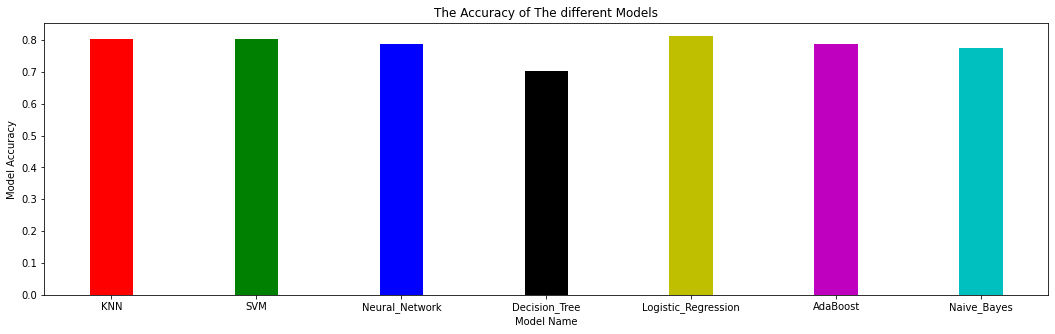

In [ ]:
# Plot The Scores Of The different Models 

Model_names = Result_dataFrame[['Model_Name']].values
Model_scores = np.float64(Result_dataFrame[['Accuracy']].values)
Model_names = Model_names.reshape(Model_names.shape[0])
Model_scores = Model_scores.reshape(Model_scores.shape[0])

fig, ax = plt.subplots(figsize=(18,5)) 
ax.bar(Model_names , Model_scores , width = 0.3 , color = 'rgbkymc')
plt.title("The Accuracy of The different Models")
plt.ylabel('Model Accuracy')
plt.xlabel('Model Name')
plt.show()

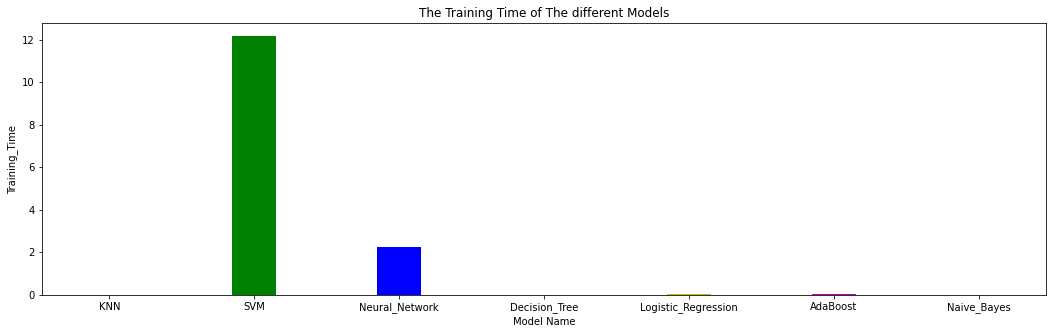

In [ ]:
# Plot The Training Time Of The different Models 

Model_names = Result_dataFrame[['Model_Name']].values
Model_scores = np.float64(Result_dataFrame[['Training_Time']].values)
Model_names = Model_names.reshape(Model_names.shape[0])
Model_scores = Model_scores.reshape(Model_scores.shape[0])

fig, ax = plt.subplots(figsize=(18,5)) 
ax.bar(Model_names , Model_scores , width = 0.3 , color = 'rgbkymc')
plt.title("The Training Time of The different Models")
plt.ylabel('Training_Time')
plt.xlabel('Model Name')
plt.show()